# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Webscrapping inflation data on website https://www.exchange-rates.org/
![](webcapture.jpg)


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
#mengambil data html dati link
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
#melihat data dari link berdasarkan urutan karakter (karakter ke-1 sampai ke-777)
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
#mengimport library beautifulsoup
from bs4 import BeautifulSoup 

#membuat variabel bernama soup
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
#melihat tampilan data soup dengan lebih baik (dengan pretiify)
print(soup.prettify()[1:777])

!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://ww


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
#mengambil data html dengan karakter 1 sampai 500
table = soup.find("table", attrs={"class" : "table table-striped table-hover table-hover-solid-row table-simple history-data"})
print(table.prettify()[1:200])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/11/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/


+ tb = table header
+ tr = table row
+ td = table cell

In [6]:
#mengambil tabelrow dari 1 sampai 3
tr = table.find_all("tr")
tr[:3]

[<tr><td>3/11/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-11-2021">14,319.87571</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-11-2021">USD IDR rate for 3/11/2021</a></td></tr>,
 <tr><td>3/10/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-10-2021">14,387.89293</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-10-2021">USD IDR rate for 3/10/2021</a></td></tr>,
 <tr><td>3/9/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-9-2021">14,396.25662</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-9-2021">USD IDR rate for 3/9/2021</a></td></tr>]

Do the scrapping process here (please change this markdown with your explanation)

In [9]:
temp = [] #initiating a tuple

for i in range(0, 12):
    row = table.find_all("tr")[i]

    date = row.find_all("td")[0].text
    date = date.strip()
    
    day = row.find_all("td")[1].text
    day = day.strip()
    
    inflation = row.find_all("td")[2].text
    inflation = inflation.strip()
    
    temp.append((date,day,inflation))
    
for i in range(14, 36):
    row = table.find_all("tr")[i]

    date = row.find_all("td")[0].text
    date = date.strip()
    
    day = row.find_all("td")[1].text
    day = day.strip()
    
    inflation = row.find_all("td")[2].text
    inflation = inflation.strip()
    
    temp.append((date,day,inflation))
    
for i in range(38, 134):
    row = table.find_all("tr")[i]

    date = row.find_all("td")[0].text
    date = date.strip()
    
    day = row.find_all("td")[1].text
    day = day.strip()
    
    inflation = row.find_all("td")[2].text
    inflation = inflation.strip()
    
    temp.append((date,day,inflation))

temp

[('3/11/2021', 'Thursday', '14,319.87571 IDR'),
 ('3/10/2021', 'Wednesday', '14,387.89293 IDR'),
 ('3/9/2021', 'Tuesday', '14,396.25662 IDR'),
 ('3/8/2021', 'Monday', '14,374.33106 IDR'),
 ('3/5/2021', 'Friday', '14,292.17893 IDR'),
 ('3/4/2021', 'Thursday', '14,261.85426 IDR'),
 ('3/3/2021', 'Wednesday', '14,257.29443 IDR'),
 ('3/2/2021', 'Tuesday', '14,256.28041 IDR'),
 ('3/1/2021', 'Monday', '14,248.60576 IDR'),
 ('2/26/2021', 'Friday', '14,300.27815 IDR'),
 ('2/25/2021', 'Thursday', '14,139.73096 IDR'),
 ('2/24/2021', 'Wednesday', '14,083.03673 IDR'),
 ('2/22/2021', 'Monday', '14,118.07274 IDR'),
 ('2/19/2021', 'Friday', '14,066.79375 IDR'),
 ('2/18/2021', 'Thursday', '14,013.51318 IDR'),
 ('2/17/2021', 'Wednesday', '14,015.16095 IDR'),
 ('2/16/2021', 'Tuesday', '13,935.96629 IDR'),
 ('2/15/2021', 'Monday', '13,918.18725 IDR'),
 ('2/12/2021', 'Friday', '13,988.54710 IDR'),
 ('2/11/2021', 'Thursday', '13,982.27900 IDR'),
 ('2/10/2021', 'Wednesday', '13,994.09212 IDR'),
 ('2/9/2021',

In [10]:
temp = temp[::-1]
temp

[('9/13/2020', 'Sunday', '14,876.45021 IDR'),
 ('9/14/2020', 'Monday', '14,864.65988 IDR'),
 ('9/15/2020', 'Tuesday', '14,843.44670 IDR'),
 ('9/16/2020', 'Wednesday', '14,807.88761 IDR'),
 ('9/17/2020', 'Thursday', '14,829.41738 IDR'),
 ('9/18/2020', 'Friday', '14,730.71792 IDR'),
 ('9/20/2020', 'Sunday', '14,728.84529 IDR'),
 ('9/21/2020', 'Monday', '14,701.43420 IDR'),
 ('9/22/2020', 'Tuesday', '14,751.85786 IDR'),
 ('9/23/2020', 'Wednesday', '14,825.54899 IDR'),
 ('9/24/2020', 'Thursday', '14,888.78607 IDR'),
 ('9/25/2020', 'Friday', '14,855.63943 IDR'),
 ('9/27/2020', 'Sunday', '14,859.98349 IDR'),
 ('9/28/2020', 'Monday', '14,892.32194 IDR'),
 ('9/29/2020', 'Tuesday', '14,880.93210 IDR'),
 ('9/30/2020', 'Wednesday', '14,867.44686 IDR'),
 ('10/1/2020', 'Thursday', '14,822.66605 IDR'),
 ('10/2/2020', 'Friday', '14,852.30483 IDR'),
 ('10/5/2020', 'Monday', '14,797.90178 IDR'),
 ('10/6/2020', 'Tuesday', '14,857.67854 IDR'),
 ('10/7/2020', 'Wednesday', '14,705.58246 IDR'),
 ('10/8/2020

## Creating data frame & Data wrangling

Put the array into dataframe

In [15]:
import pandas as pd

df = pd.DataFrame(temp, columns=("date","day","inflation"))
df.head()

,date,day,inflation
0,9/13/2020,Sunday,"14,876.45021 IDR"
1,9/14/2020,Monday,"14,864.65988 IDR"
2,9/15/2020,Tuesday,"14,843.44670 IDR"
3,9/16/2020,Wednesday,"14,807.88761 IDR"
4,9/17/2020,Thursday,"14,829.41738 IDR"


In [16]:
df["inflation"] = df["inflation"].str.replace(" IDR","")
df["inflation"] = df["inflation"].str.replace(",","")
df.head()

,date,day,inflation
0,9/13/2020,Sunday,14876.45021
1,9/14/2020,Monday,14864.65988
2,9/15/2020,Tuesday,14843.44670
3,9/16/2020,Wednesday,14807.88761
4,9/17/2020,Thursday,14829.41738


In [17]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["inflation"] = df["inflation"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       130 non-null    datetime64[ns]
 1   day        130 non-null    object        
 2   inflation  130 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.2+ KB


In [18]:
df["date"] = df["date"].dt.strftime('%d-%m-%Y')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head()

,date,day,inflation
0,13-09-2020,Sunday,14876.450
1,14-09-2020,Monday,14864.660
2,15-09-2020,Tuesday,14843.447
3,16-09-2020,Wednesday,14807.888
4,17-09-2020,Thursday,14829.417


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [26]:
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
wrg = pd.crosstab(index=df["day"],
           columns="Inflations",
            values=df["inflation"],
            aggfunc="mean")
wrg = wrg.reindex(wday)
wrg

col_0,Inflations
day,
Monday,14305.766
Tuesday,14291.571
Wednesday,14281.669
Thursday,14296.955
Friday,14289.538


In [27]:
wrg.columns.name="Data"

In [28]:
wrg

Data,Inflations
day,
Monday,14305.766
Tuesday,14291.571
Wednesday,14281.669
Thursday,14296.955
Friday,14289.538


<AxesSubplot:xlabel='Day', ylabel='Inflation Value'>

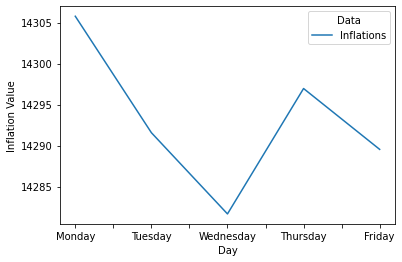

In [29]:
#melihat Plot urutan inflasi berdasarkan hari
wrg.plot(xlabel="Day",ylabel="Inflation Value")

In [45]:
wrg2 = df.copy()
wrg2["date"] = pd.to_datetime(wrg2["date"])
wrg2.head()

,date,day,inflation
0,2020-09-13,Sunday,14876.450
1,2020-09-14,Monday,14864.660
2,2020-09-15,Tuesday,14843.447
3,2020-09-16,Wednesday,14807.888
4,2020-09-17,Thursday,14829.417


In [46]:
wrg2["date"] = wrg2["date"].dt.to_period("M")

In [47]:
wrg2 = pd.crosstab(index=wrg2["date"],
                   columns="Inflationss",
                   values = wrg2["inflation"],
                   aggfunc="mean")
wrg2.head()

col_0,Inflationss
date,
2020-09,14825.336
2020-10,14698.505
2020-11,14204.376
2020-12,14115.666
2021-01,14041.508


In [48]:
wrg2.columns.name="Data"

In [49]:
wrg2.head()

Data,Inflationss
date,
2020-09,14825.336
2020-10,14698.505
2020-11,14204.376
2020-12,14115.666
2021-01,14041.508


<AxesSubplot:xlabel='Month', ylabel='Inflation Value'>

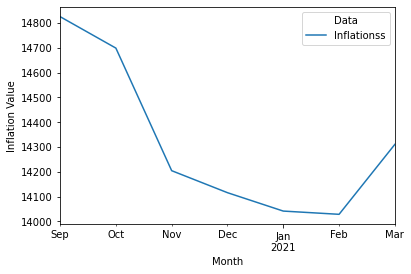

In [50]:
#melihat Plot urutan inflasi berdasarkan year-month
wrg2.plot(xlabel="Month",ylabel="Inflation Value")

In [51]:
wrg3 = pd.crosstab(index=df["date"],
           columns="Inflasi",
            values=df["inflation"],
            aggfunc="mean")
wrg3.head()

col_0,Inflasi
date,
01-01-2021,14213.675
01-04-2021,14015.869
01-05-2021,13906.057
01-06-2021,13861.515
01-07-2021,13905.644


In [52]:
wrg3.columns.name="Data"

<AxesSubplot:xlabel='date'>

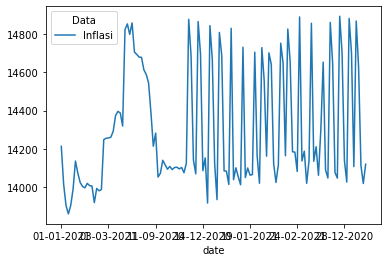

In [53]:
wrg3.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Day', ylabel='Inflation Value'>

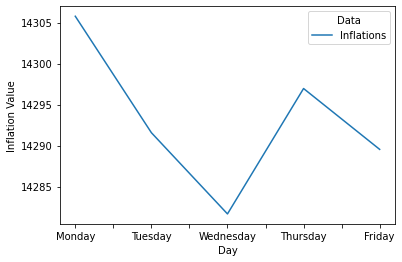

In [54]:
#The lowest inflations is on Wednesday
wrg.plot(xlabel="Day",ylabel="Inflation Value")


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

<AxesSubplot:xlabel='Month', ylabel='Inflation Value'>

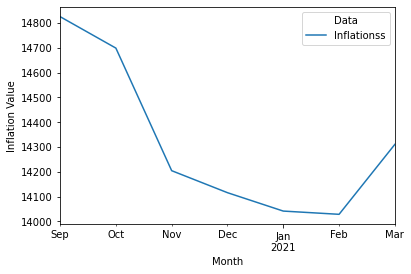

In [55]:
#From September-2020 until March-2021 (per-month) inflations down on Jan and up on March
wrg2.plot(xlabel="Month",ylabel="Inflation Value")

<AxesSubplot:xlabel='date'>

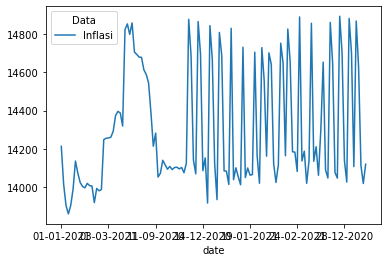

In [56]:
#From 6-Sep-2020 until 5-Mar-2021, inflations still fluctuatif
wrg3.plot()